# Import Thu vien

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cai dat params

In [2]:
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'feature_vector': True
}


# Load data

In [3]:
def load_data(folder_path, label):
    features = []
    images = []
    for file in os.listdir(folder_path):
        if file.endswith(".jpg"):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path, as_gray=True)
            image = resize(image, (256, 128))  # ảnh gốc
            images.append(image)               # lưu ảnh gốc
            feature = hog(image, **hog_params)
            features.append(feature)
    return features, [label] * len(features), images


In [4]:
pedestrian_dir = "MyPedestrian/Pedestrian"
non_pedestrian_dir = "MyPedestrian/NonPedestrian"

# Plot 

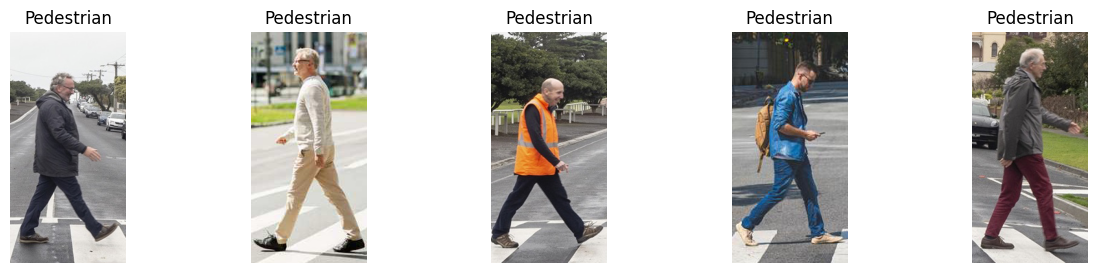

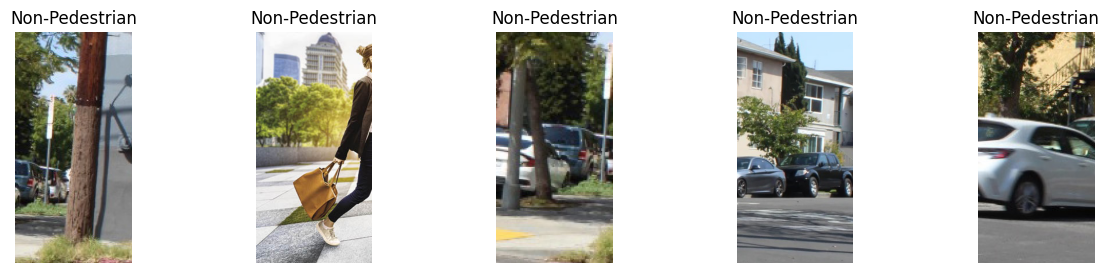

In [5]:
def plot_examples(folder_path, label_name, n=5):
    files = [f for f in os.listdir(folder_path) if f.endswith(".jpg") or f.endswith(".png")]
    plt.figure(figsize=(15, 3))
    for i, file in enumerate(files[:n]):
        image_path = os.path.join(folder_path, file)
        image = imread(image_path)
        plt.subplot(1, n, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{label_name}")
        plt.axis('off')
    plt.show()

plot_examples(pedestrian_dir, "Pedestrian", n=5)
plot_examples(non_pedestrian_dir, "Non-Pedestrian", n=5)


# Tao dataset

In [6]:
X1, y1, imgs1 = load_data(pedestrian_dir, 1)
X0, y0, imgs0 = load_data(non_pedestrian_dir, 0)

X = np.array(X1 + X0)
y = np.array(y1 + y0)
images = np.array(imgs1 + imgs0)


In [7]:
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(X, y, images, test_size=0.3, random_state=42)


# Huan luyen mo hinh

In [8]:
# Mô hình KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [9]:
# Mô hình Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)


In [10]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Pedestrian", "Pedestrian"], yticklabels=["Non-Pedestrian", "Pedestrian"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7

    accuracy                           0.83        12
   macro avg       0.86      0.86      0.83        12
weighted avg       0.88      0.83      0.83        12



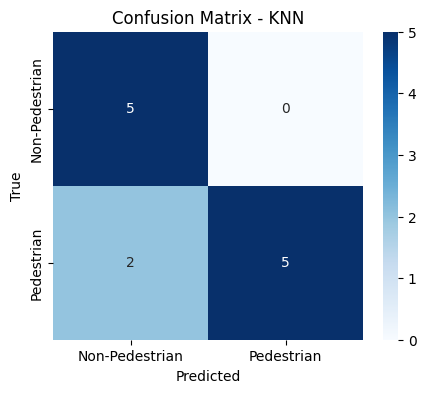

In [11]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
plot_confusion(y_test, y_pred_knn, "Confusion Matrix - KNN")

LR - Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



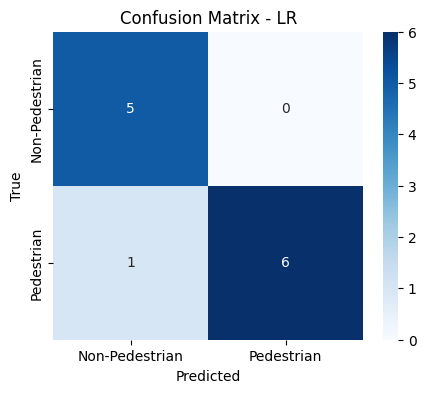

In [12]:
print("LR - Classification Report:")
print(classification_report(y_test, y_pred_log))
plot_confusion(y_test, y_pred_log, "Confusion Matrix - LR")

In [13]:
def plot_misclassified_images(images, y_true, y_pred, n=10):
    misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred]

    plt.figure(figsize=(20, 7))
    for i, idx in enumerate(misclassified_indices[:n]):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# KNN - Missclassified 

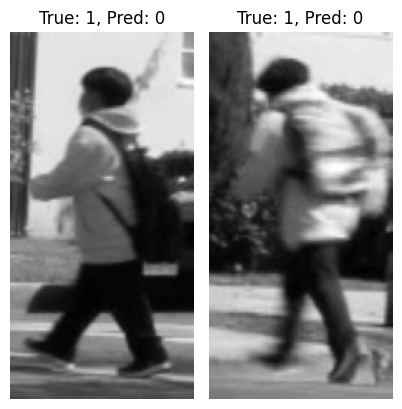

In [14]:
plot_misclassified_images(img_test, y_test, y_pred_knn)

# Logistic - Missclassified

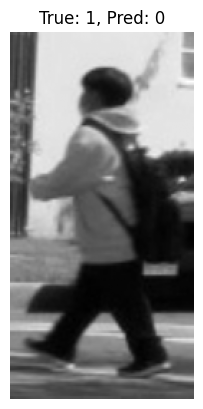

In [15]:
plot_misclassified_images(img_test, y_test, y_pred_log)